# This notebook tests the outputs of VESIcal for the Moore et al. (1998) model.
- This notebook relies on the Excel spreadsheet entitled: "S6_Testing_Moore_et_al_1998.xlsx"
- Test 1 compares the experimental pressures in the H$_2$O-only experiments in the calibration dataset of Moore et al. (1998) with the saturation pressures obtained from VESIcal for the "MooreWater" model. The correspondence is good, considering the experimental scatter, and is vastly improved if experimental and saturation pressures >3000 bars are removed (the upper limit of the calibration range suggested by Moore et al.)
- Test 2 compares the wt% H$_2$O in the melt estimated using the excel spreadsheet of Moore et al. (1998) to the outputs of VESIcal for a synthetic array of inputs. The outputs match to within +- 0.5%. 

In [1]:
import VESIcal as v
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display, HTML
import pandas as pd
import matplotlib as mpl
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
%matplotlib inline

In [2]:
sns.set(style="ticks", context="poster",rc={"grid.linewidth": 1,"xtick.major.width": 1,"ytick.major.width": 1, 'patch.edgecolor': 'black'})
plt.style.use("seaborn-colorblind")
plt.rcParams["font.size"] =12
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1 
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 4 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 14 # Overall title
plt.rcParams["axes.labelsize"] = 14 # Axes labels
plt.rcParams["legend.fontsize"]= 14

# Test 1 - Comparing experimental pressures to those calculated from VESIcal

In [3]:
# This loads the calibration dataset of Moore et al. 1998, and calculates saturation pressures based on the major element contents, temperature, and water content.
myfile= v.BatchFile('S6_Testing_Moore_et_al_1998.xlsx', sheet_name='Calibration')
data = myfile.get_data()
satPs_wtemps_Moore_Water=myfile.calculate_saturation_pressure(temperature="Temp", model='MooreWater')

Text(0.5, 0.98, 'Test 1 - Comparing saturation pressures to experimental pressures')

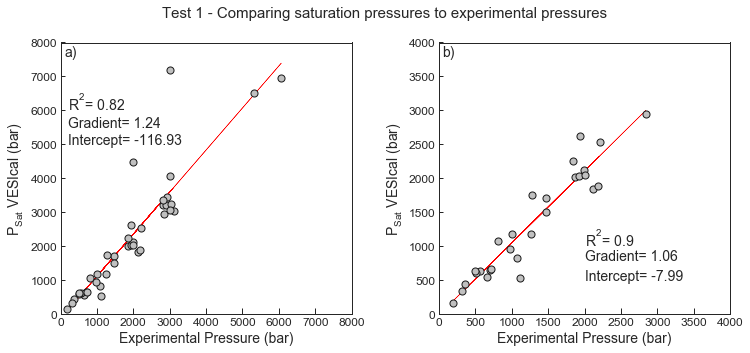

In [4]:
# This calculating a linear regression, and plots experimental pressures vs. saturation pressures (all data)
X_Test1=satPs_wtemps_Moore_Water['Press'] 
Y_Test1=satPs_wtemps_Moore_Water['SaturationP_bars_VESIcal']
mask_Test1 = (X_Test1>-1) & (Y_Test1>-1) #This gets rid of Nans
X_Test1noNan=X_Test1[mask_Test1].values.reshape(-1, 1)
Y_Test1noNan=Y_Test1[mask_Test1].values.reshape(-1, 1)
lr=LinearRegression()
lr.fit(X_Test1noNan,Y_Test1noNan)
Y_pred_Test1=lr.predict(X_Test1noNan)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5)) # adjust dimensions of figure here
ax1.set_xlabel('Experimental Pressure (bar)', fontsize=14)
ax1.set_ylabel('P$_{Sat}$ VESIcal (bar)', fontsize=14)
ax1.plot(X_Test1noNan,Y_pred_Test1, color='red', linewidth=0.5, zorder=1) # This plots the best fit line
ax1.scatter(satPs_wtemps_Moore_Water['Press'], satPs_wtemps_Moore_Water['SaturationP_bars_VESIcal'],  s=50, edgecolors='k', facecolors='silver', marker='o', zorder=5)
# This bit plots the regression parameters on the graph
I='Intercept= ' + str(np.round(lr.intercept_, 2))[1:-1]
G='Gradient= '  + str(np.round(lr.coef_, 2))[2:-2]
R='R$^2$= ' +  str(np.round(r2_score(Y_Test1noNan, Y_pred_Test1), 2)) 

ax1.text(200, 5000, I, fontsize=14)
ax1.text(200,5500, G, fontsize=14)
ax1.text(200, 6000,  R, fontsize=14)
ax1.set_xlim([0, 8000])
ax1.set_ylim([0, 8000])
###################################################### Trimmed so only considering saturation pressures <3000
X_Test1=satPs_wtemps_Moore_Water['Press'] 
Y_Test1=satPs_wtemps_Moore_Water['SaturationP_bars_VESIcal']
mask_Test1 = (X_Test1<3000) & (Y_Test1<3000) #This gets rid of data with P>3000 (The suggested calibration range)
X_Test1noNan=X_Test1[mask_Test1].values.reshape(-1, 1)
Y_Test1noNan=Y_Test1[mask_Test1].values.reshape(-1, 1)
lr=LinearRegression()
lr.fit(X_Test1noNan,Y_Test1noNan)
Y_pred_Test1=lr.predict(X_Test1noNan)


ax2.plot(X_Test1noNan,Y_pred_Test1, color='red', linewidth=0.5, zorder=1) # This plots the best fit line
ax2.scatter(X_Test1noNan, Y_Test1noNan,  s=50, edgecolors='k', facecolors='silver', marker='o', zorder=5)

I='Intercept= ' + str(np.round(lr.intercept_, 2))[1:-1]
G='Gradient= '  + str(np.round(lr.coef_, 2))[2:-2]
R='R$^2$= ' +  str(np.round(r2_score(Y_Test1noNan, Y_pred_Test1), 2)) 

ax2.text(2000, 500, I, fontsize=14)
ax2.text(2000,800, G, fontsize=14)
ax2.text(2000, 1000,  R, fontsize=14)
ax2.set_xlabel('Experimental Pressure (bar)', fontsize=14)
ax2.set_ylabel('P$_{Sat}$ VESIcal (bar)', fontsize=14)
ax2.set_xlim([0, 4000])
ax2.set_ylim([0, 4000])
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.3, hspace=None)
ax1.text(100, 7600, 'a)', fontsize=14)
ax2.text(50, 3800, 'b)', fontsize=14)
fig.savefig('Moore_Test1.png', transparent=True)
fig.suptitle('Test 1 - Comparing saturation pressures to experimental pressures', fontsize=15)


# Test 2 - Comparing VESIcal outputs to the spreadsheet of Moore et al. (1998) 
-  The excel spreadsheet of Moore et al. (1998) was used to calculate the wt% H$_2$O in the melt for a synthetic array of inputs provided as the sheet "Synthetic". Temperature, pressure, melt composition, and the molar fraction of water were all varied within these synthetic inputs. 

In [5]:
# This loads in the synthetic datasets, and calculates dissolved volatiles
myfile_syn= v.BatchFile('S6_Testing_Moore_et_al_1998.xlsx', sheet_name='Synthetic')
data_syn = myfile_syn.get_data()
dissolved_syn = myfile_syn.calculate_dissolved_volatiles(temperature="Temp", pressure="Press", X_fluid="XH2OVapour", print_status=True, model='MooreWater')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Total iron column FeOT detected. This column will be treated as FeO. If Fe2O3 data are not given, Fe2O3 will be 0.0. In future, an option to calcualte FeO/Fe2O3 based on fO2 will be implemented.
  


Text(0.5, 0.98, 'Test 2 - Comparing dissolved H$_2$O contents')

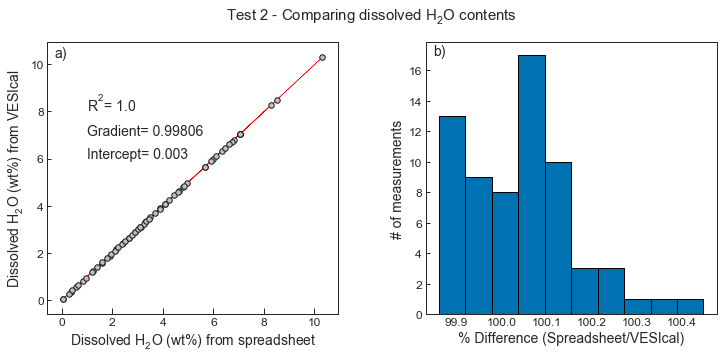

In [6]:
# This calculating a Linear regression, and plots the spreadsheet outputs against VESICal outputs
X_syn1=dissolved_syn['wt% H2O in melt'].values.reshape(-1, 1) 
Y_syn1=dissolved_syn['H2O_liq_VESIcal'].values.reshape(-1, 1)
lr=LinearRegression()
lr.fit(X_syn1,Y_syn1)
Y_pred_syn1=lr.predict(X_syn1)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5)) # adjust dimensions of figure here


ax1.set_xlabel('Dissolved H$_2$O (wt%) from spreadsheet',  fontsize=14)
ax1.set_ylabel('Dissolved H$_2$O (wt%) from VESIcal', fontsize=14)
ax1.plot(X_syn1,Y_pred_syn1, color='red', linewidth=0.5, zorder=1) # This plots the best fit line
ax1.scatter(dissolved_syn['wt% H2O in melt'], dissolved_syn['H2O_liq_VESIcal'],  s=30, edgecolors='k', facecolors='silver', marker='o', zorder=5)
# This bit plots the regression parameters on the graph
I='Intercept= ' + str(np.round(lr.intercept_, 3))[1:-1]
G='Gradient= '  + str(np.round(lr.coef_, 5))[2:-2]
R='R$^2$= ' +  str(np.round(r2_score(Y_syn1, Y_pred_syn1), 5)) 


ax1.text(1, 6, I, fontsize=14)
ax1.text(1, 7, G, fontsize=14)
ax1.text(1, 8, R, fontsize=14)
############## Histogram showing difference as a %
ax2.set_xlabel('% Difference (Spreadsheet/VESIcal)',  fontsize=14)
ax2.set_ylabel('# of measurements',  fontsize=14)
ax2.hist(100*dissolved_syn['wt% H2O in melt']/ dissolved_syn['H2O_liq_VESIcal'])
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.3, hspace=None)
ax1.text(-0.3, 10.3, 'a)', fontsize=14)
ax2.text(99.85, 17, 'b)', fontsize=14)
fig.savefig('Moore_Test2.png', transparent=True)
fig.suptitle('Test 2 - Comparing dissolved H$_2$O contents', fontsize=15)


These very small discrepencies correlate with pressure. However, as they are << 1%, these differences are overwhelmed by the uncertainty in the empirical calibration (see the scatter in the calibration dataset in Test 1)  

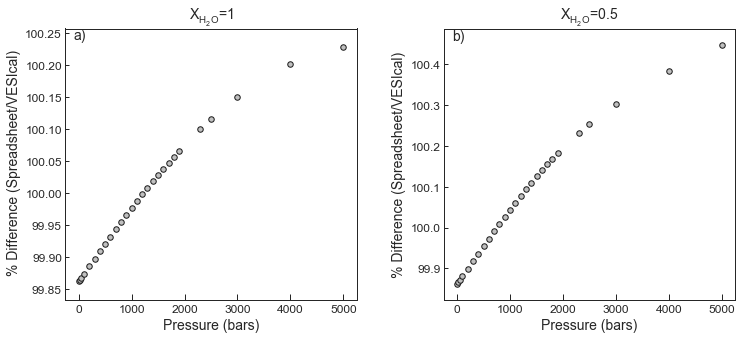

In [7]:
#  Assessing discrepency vs Pressure
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5)) # adjust dimensions of figure here

# for 1200C, XH2O=1
Diff=(dissolved_syn.loc[dissolved_syn.XH2OVapour==1, ['wt% H2O in melt']].values)/(dissolved_syn.loc[dissolved_syn.XH2OVapour==1, ['H2O_liq_VESIcal']].values)
X=dissolved_syn.loc[dissolved_syn.XH2OVapour==1, ['Press']].values

ax1.scatter(X, 100*Diff, s=30, edgecolors='k', facecolors='silver', marker='o', zorder=5)
ax1.set_ylabel(' % Difference (Spreadsheet/VESIcal)',   fontsize=14)
ax1.set_xlabel('Pressure (bars)',  fontsize=14)
ax1.set_title('X$_{H_{2}O}$=1',  fontsize=14)

# for 1200C, XH2O=0.5
Diff2=(dissolved_syn.loc[dissolved_syn.XH2OVapour==0.5, ['wt% H2O in melt']].values)/(dissolved_syn.loc[dissolved_syn.XH2OVapour==0.5, ['H2O_liq_VESIcal']].values)
X2=dissolved_syn.loc[dissolved_syn.XH2OVapour==0.5, ['Press']].values
ax2.scatter(X2, 100*Diff2, s=30, edgecolors='k', facecolors='silver', marker='o', zorder=5)
ax2.set_ylabel('% Difference (Spreadsheet/VESIcal)',   fontsize=14)
ax2.set_xlabel('Pressure (bars)',   fontsize=14)
ax2.set_title('X$_{H_{2}O}$=0.5',  fontsize=14)

ax1.text(-100, 100.24, 'a)', fontsize=14)
ax2.text(-100, 100.46, 'b)', fontsize=14)
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.3, hspace=None)
fig.savefig('Moore_Fig3.png', transparent=True)
